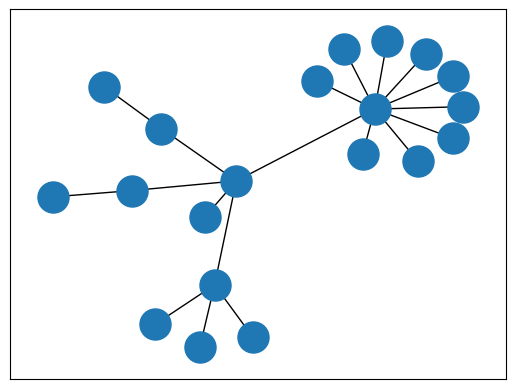

In [73]:
import random
import networkx as nx
import matplotlib.pyplot as plt
# from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_pydot import pydot_layout

nodes = 20
depth = 3

class Node:
    def __init__(self, id, depth):
        self.id = id
        self.depth = depth

root = Node(1, 1)
nodenum = 2
graph = nx.Graph()
graph.add_node(root)

while nodenum <= nodes:
    while True:
        random_node = random.choice(list(graph.nodes))
        if random_node.depth <= depth - 1:
            break
    new_node = Node(nodenum, random_node.depth + 1)
    graph.add_node(new_node)
    graph.add_edge(random_node, new_node)
    nodenum += 1

vertex_labels = {}
edge_labels = {}

# pos = pydot_layout(graph, prog='dot')

nx.draw_networkx(graph, labels=vertex_labels, node_size=500)
plt.show()

In [208]:
20 / 19

1.0526315789473684

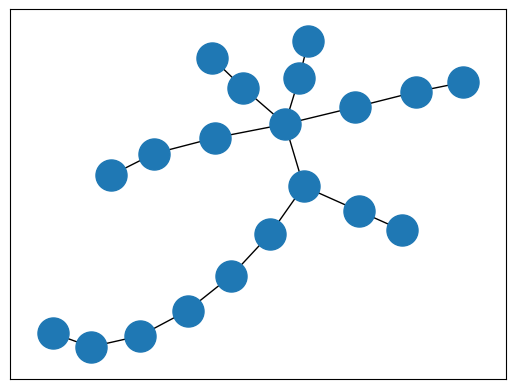

In [14]:
import random
import networkx as nx
import matplotlib.pyplot as plt
# from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_pydot import pydot_layout

nodes = 20
depth = 5
max_branches = nodes / (depth - 1)

class Node:
    def __init__(self, id, depth):
        self.id = id
        self.depth = depth

root = Node(1, 1)
nodenum = 2
graph = nx.Graph()
graph.add_node(root)

leaves = {root.id: root}
branches = 1

def is_branching_possible():
    return max_branches - branches >= 0

while nodenum <= nodes:
    while True:
        # print(is_branching_possible(), max_branches, branches)
        if is_branching_possible():
            random_node = random.choice(list(graph.nodes))
        
            if random_node.depth <= depth - 1:
                break
        else:
            random_node_id = random.choice(list(leaves))
            random_node = leaves[random_node_id]
            break

    new_node = Node(nodenum, random_node.depth + 1)
    graph.add_node(new_node)
    graph.add_edge(random_node, new_node)
    nodenum += 1

    leaves[new_node.id] = new_node
    if(random_node.id in leaves):
        del leaves[random_node.id]
    else: 
        branches = branches+1

vertex_labels = {}
edge_labels = {}

# pos = pydot_layout(graph, prog='dot')

nx.draw_networkx(graph, labels=vertex_labels, node_size=500)
plt.show()


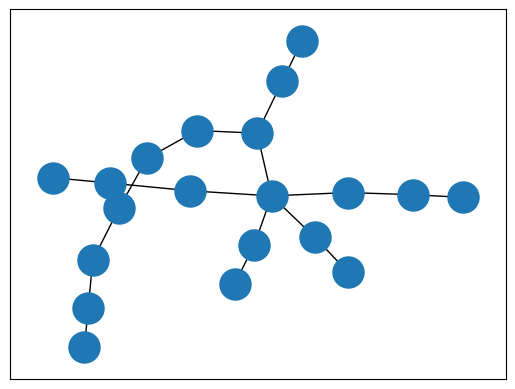

In [21]:
nx.random_tree(20)
nx.draw_networkx(graph, labels={}, node_size=500)

In [7]:
wanted1 = 6
wanted2 = 10
wanted3 = 17
allwanted = sum([wanted1, wanted2, wanted3])

def calc(wanted, nodeAmount, allwanted):
    return (wanted - nodeAmount) / allwanted

calc(wanted3, 0, allwanted),calc(wanted2, 0, allwanted),calc(wanted1, 0, allwanted), calc(wanted3, 0, allwanted)+calc(wanted2, 0, allwanted)+calc(wanted1, 0, allwanted)

(0.5151515151515151, 0.30303030303030304, 0.18181818181818182, 1.0)

In [ ]:
maxBranchAmountPerBranch = 4
minBranchAmountPerBranch = 2

minBranches = (wanted1 + wanted2 + wanted3) * 2


In [265]:
import random
 
def print_tree_edges(prufer, m):
    vertices = m + 2
    vertex_set = [0] * vertices
 
    # Initialize the array of vertices
    for i in range(vertices):
        vertex_set[i] = 0
 
    # Number of occurrences of vertex in code
    for i in range(vertices - 2):
        vertex_set[prufer[i] - 1] += 1
 
    print("\nThe edge set E(G) is:")
 
    j = 0
 
    # Find the smallest label not present in prufer[].
    for i in range(vertices - 2):
        for j in range(vertices):
            # If j+1 is not present in prufer set
            if vertex_set[j] == 0:
                # Remove from Prufer set and print pair.
                vertex_set[j] = -1
                print("({}, {})".format(j + 1, prufer[i]), end=" ")
 
                vertex_set[prufer[i] - 1] -= 1
 
                break
 
    j = 0
 
    # For the last element
    for i in range(vertices):
        if vertex_set[i] == 0 and j == 0:
            print("({}, ".format(i + 1), end="")
            j += 1
        elif vertex_set[i] == 0 and j == 1:
            print("{})".format(i + 1))
 
def generate_random_tree(n):
    length = n - 2
    arr = [0] * length
 
    # Generate random array
    for i in range(length):
        arr[i] = random.randint(1, length + 1)
 
    print_tree_edges(arr, length)
 
# Driver code
n = 5
generate_random_tree(n)


The edge set E(G) is:
(3, 1) (1, 4) (4, 2) (2, 5)


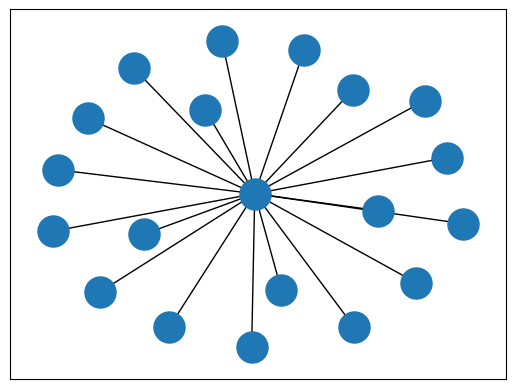

In [202]:
import random
import networkx as nx
import matplotlib.pyplot as plt
# from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_pydot import pydot_layout

nodes = 20
depth = 2

class Node:
    def __init__(self, id, depth):
        self.id = id
        self.depth = depth

root = Node(1, 1)
nodenum = 2
graph = nx.Graph()
graph.add_node(root)

while nodenum <= nodes:
    while True:
        random_node = random.choice(list(graph.nodes))
        if random_node.depth <= depth - 1:
            break
    new_node = Node(nodenum, random_node.depth + 1)
    graph.add_node(new_node)
    graph.add_edge(random_node, new_node)
    nodenum += 1

vertex_labels = {}
edge_labels = {}

# pos = pydot_layout(graph, prog='dot')

nx.draw_networkx(graph, labels=vertex_labels, node_size=500)
plt.show()


In [24]:
import random

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

def display_tree(root, level=0):
    if root is None:
        return

    print("  " * level + str(root.value))  # Display the current node value

    for child in root.children:
        display_tree(child, level + 1)  # Recursively display each child

def generate_random_tree(depth, outdegree, nodes):
    if depth <= 0 or outdegree <= 0 or nodes <= 0:
        return None

    root = TreeNode(random.randint(1, 100))  # Generate a random value for the root node

    if depth == 1:
        return root

    # Generate children for the root node
    num_children = min(outdegree, nodes - 1)
    nodes -= num_children
    for _ in range(num_children):
        child = generate_random_tree(depth - 1, outdegree, nodes)
        if child:
            root.children.append(child)

    # Generate children for the rest of the nodes
    for child in root.children:
        num_children = min(outdegree, nodes)
        nodes -= num_children
        for _ in range(num_children):
            grandchild = generate_random_tree(depth - 1, outdegree, nodes)
            if grandchild:
                child.children.append(grandchild)

    return root

# Example usage:
random_tree = generate_random_tree(depth=3, outdegree=2, nodes=10)
display_tree(random_tree)


16
  32
    75
      40
      38
    57
      86
      91
    31
      25
        14
        61
      4
    32
      74
        66
        44
      98
  53
    14
      98
      95
    62
      66
      78
    20
      23
      67
    65
      80
      71


ImportError: requires pygraphviz http://pygraphviz.github.io/

In [14]:
import sys

nx.drawing.nx_pydot.write_dot(graph,sys.stdout)

strict graph  {
<__main__.Node object at 0x000001BD7D8B41D0>;
<__main__.Node object at 0x000001BD7D909710>;
<__main__.Node object at 0x000001BD7CFB2FD0>;
<__main__.Node object at 0x000001BD7CFB0D10>;
<__main__.Node object at 0x000001BD7D018E90>;
<__main__.Node object at 0x000001BD7D01B390>;
<__main__.Node object at 0x000001BD7D019310>;
<__main__.Node object at 0x000001BD7D019650>;
<__main__.Node object at 0x000001BD7DA65890>;
<__main__.Node object at 0x000001BD7DA67510>;
<__main__.Node object at 0x000001BD7DA90ED0>;
<__main__.Node object at 0x000001BD7CEAB310>;
<__main__.Node object at 0x000001BD7CEABA50>;
<__main__.Node object at 0x000001BD7CEA8590>;
<__main__.Node object at 0x000001BD7DA612D0>;
<__main__.Node object at 0x000001BD7DA60890>;
<__main__.Node object at 0x000001BD7DA61090>;
<__main__.Node object at 0x000001BD7DA60150>;
<__main__.Node object at 0x000001BD7CE6DD10>;
<__main__.Node object at 0x000001BD7CE6CB10>;
<__main__.Node object at 0x000001BD7D8B41D0> -- <__main__.Node o